In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #split training and testing data
from sklearn.linear_model import LogisticRegression #machine learning

In [2]:
df = pd.read_csv("Iris.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  100 non-null    float64
 1   SepalWidthCm   100 non-null    float64
 2   PetalLengthCm  100 non-null    float64
 3   PetalWidthCm   100 non-null    float64
 4   Species        100 non-null    object 
dtypes: float64(4), object(1)
memory usage: 4.0+ KB


In [4]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,7.0,3.2,4.7,1.4,Iris-versicolor
1,6.4,3.2,4.5,1.5,Iris-versicolor
2,6.9,3.1,4.9,1.5,Iris-versicolor
3,5.5,2.3,4.0,1.3,Iris-versicolor
4,6.5,2.8,4.6,1.5,Iris-versicolor


In [5]:
df.Species.unique()

array(['Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
X = df.drop(['Species'], axis=1)
y = df.Species.values

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
accuracies = {}

In [9]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

acc = lr.score(X_test, y_test)*100
accuracies['Logistic Regression'] = acc

print("Test Accuracy {}".format(acc))

Test Accuracy 93.33333333333333


In [10]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

acc = dtc.score(X_test, y_test)*100

accuracies['Decision Tree Classifier'] = acc
print("Test Accuracy {}".format(acc))

Test Accuracy 76.66666666666667


In [11]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

acc = rfc.score(X_test, y_test)*100
accuracies['Random Forest Classifier'] = acc

print("Test Accuracy {}".format(acc))

Test Accuracy 83.33333333333334


In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

acc = knn.score(X_test, y_test)*100
accuracies['KNeighbors Classifier'] = acc

print("Test Accuracy {}".format(acc))

Test Accuracy 83.33333333333334


In [13]:
for model, accuracy in accuracies.items():
    print(f"{model}: {accuracy:.2f}%") #f-string

Logistic Regression: 93.33%
Decision Tree Classifier: 76.67%
Random Forest Classifier: 83.33%
KNeighbors Classifier: 83.33%


In [14]:
for model, accuracy in accuracies.items():
    print("{}: {:.2f}%".format(model, accuracy)) #.format

Logistic Regression: 93.33%
Decision Tree Classifier: 76.67%
Random Forest Classifier: 83.33%
KNeighbors Classifier: 83.33%


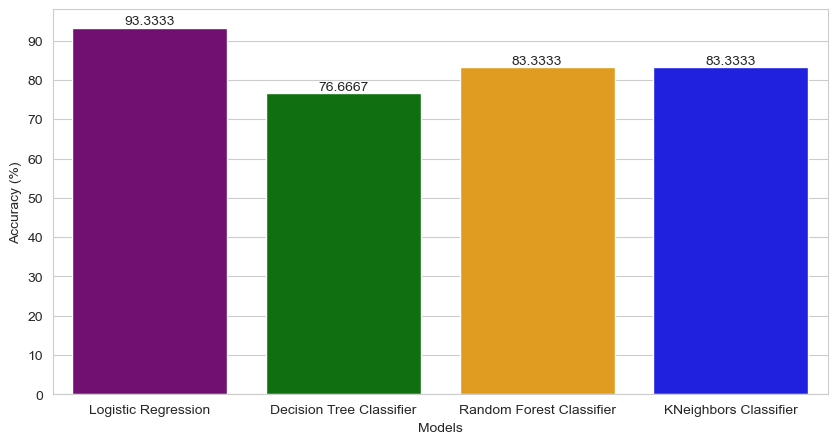

In [15]:
colors = ["purple", "green", "orange", "blue"]

sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))
plt.yticks(np.arange(0, 100, 10))
plt.xlabel("Models")
plt.ylabel("Accuracy (%)")

ax = sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)

for container in ax.containers:
    ax.bar_label(container)

plt.show()

In [16]:
y_head_lr = lr.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_head_lr)
precision = precision_score(y_test, y_head_lr, average='weighted')  # Use 'weighted' for multi-class problems
recall = recall_score(y_test, y_head_lr, average='weighted')  # Use 'weighted' for multi-class problems
f1 = f1_score(y_test, y_head_lr, average='weighted')  # Use 'weighted' for multi-class problems

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.93
Precision: 0.93
Recall: 0.93
F1 Score: 0.93


In [17]:
from sklearn.metrics import confusion_matrix

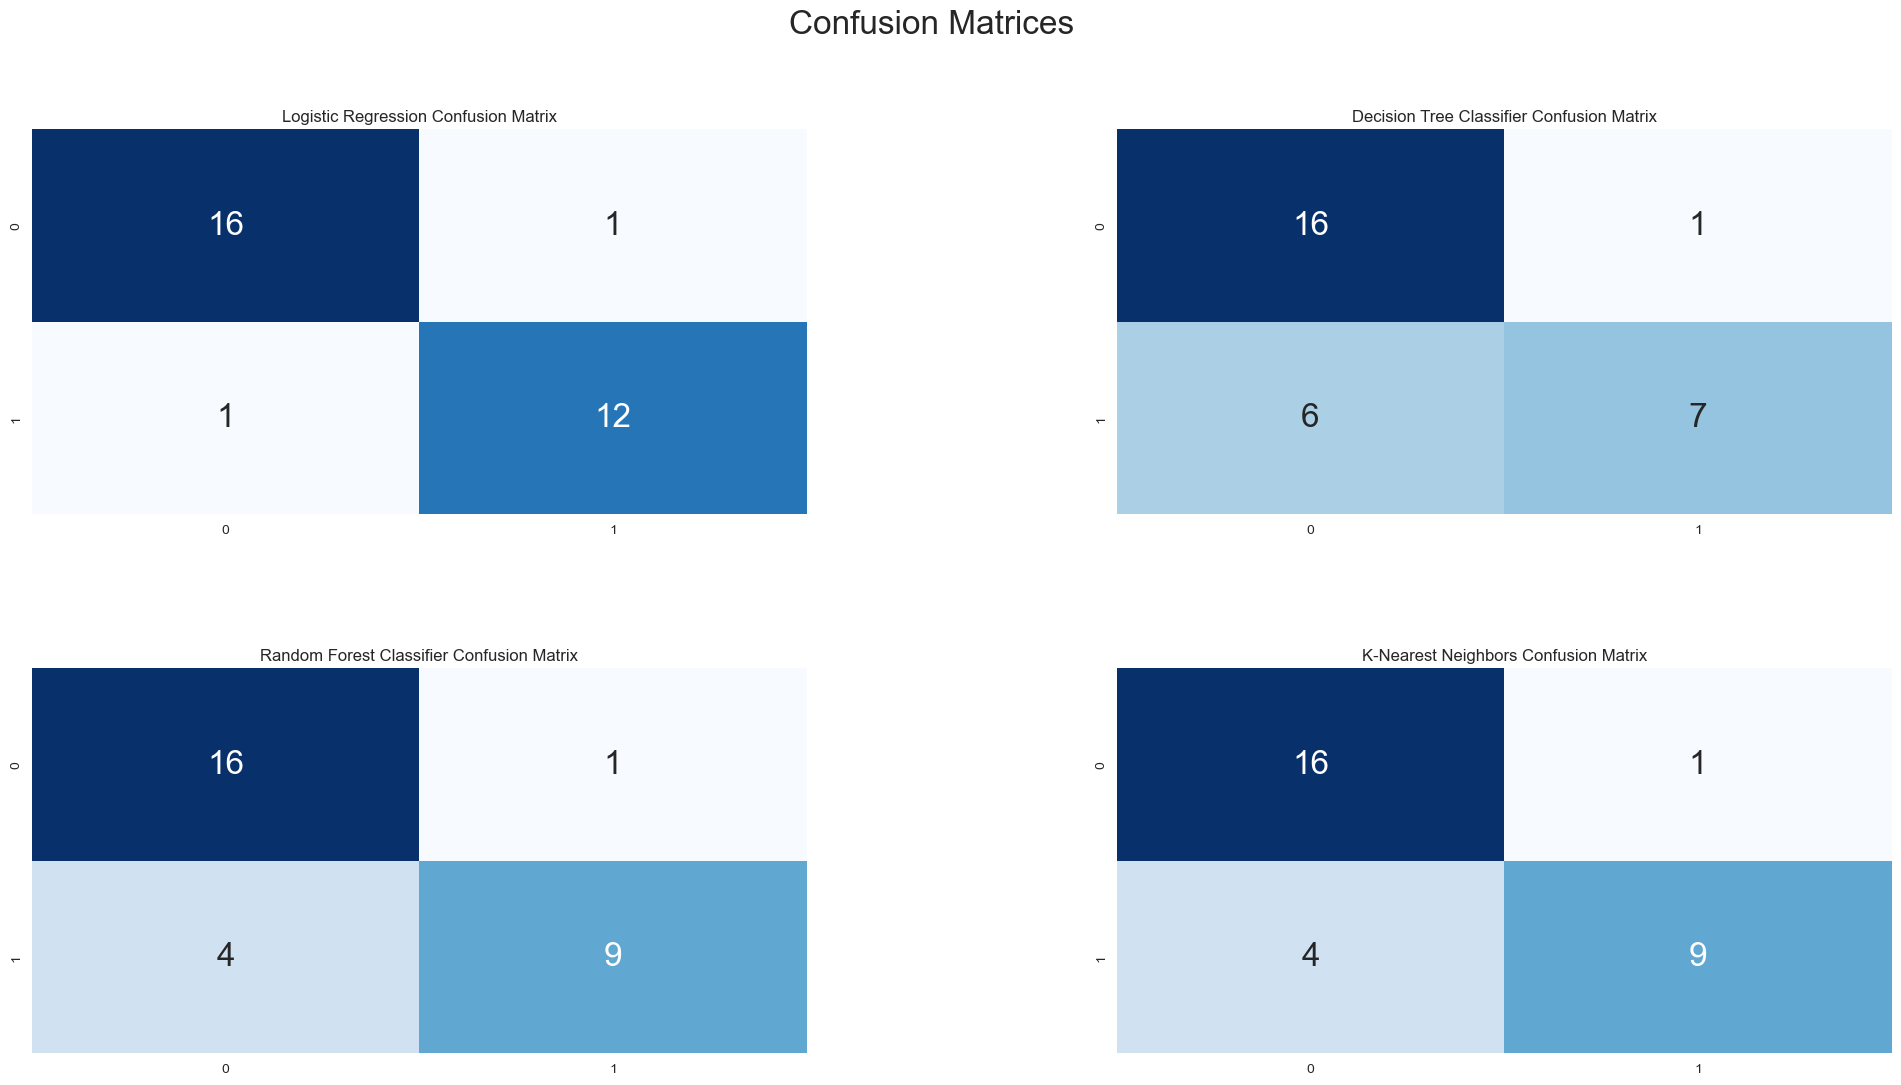

In [18]:
y_head_lr = lr.predict(X_test)
cm_lr = confusion_matrix(y_test, y_head_lr)

y_head_dtc = dtc.predict(X_test)
cm_dtc = confusion_matrix(y_test, y_head_dtc)

y_head_rfc = rfc.predict(X_test)
cm_rfc = confusion_matrix(y_test, y_head_rfc)

y_head_knn = knn.predict(X_test)
cm_knn = confusion_matrix(y_test, y_head_knn)

plt.figure(figsize=(24, 12))

plt.suptitle("Confusion Matrices", fontsize=24)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

plt.subplot(2, 2, 1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24})

plt.subplot(2, 2, 2)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24})

plt.subplot(2, 2, 3)
plt.title("Random Forest Classifier Confusion Matrix")
sns.heatmap(cm_rfc, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24})

plt.subplot(2, 2, 4)
plt.title("K-Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24})

plt.show()